# Top Rated Movies: Data Cleaning and Exploratory Analysis

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, mstats

In [4]:
# install chunk

In [5]:
url = 'https://raw.githubusercontent.com/ndcarlos/top-movies/refs/heads/main/movie.csv'
dat = pd.read_csv(url, index_col = 0)
dat

,id,title,overview,release_date,popularity,vote_average,vote_count
0,960258,Shark Bait,A group of friends enjoying a weekend steal a ...,2022-05-13,34.679,5.697,318
1,11067,Major League II,"After losing in the ALCS the year before, the ...",1994-03-30,16.374,5.697,320
2,20856,Aliens in the Attic,A group of kids must protect their vacation ho...,2009-07-30,20.437,5.696,973
3,14098,100 Feet,After Marnie Watson kills her abusive husband ...,2008-07-22,18.927,5.696,304
4,11398,The Art of War,Neil Shaw is both agent and weapon - a critica...,2000-08-25,12.022,5.696,477
...,...,...,...,...,...,...,...
8575,10723,Bulletproof,An undercover police officer named Rock Keats ...,1996-09-06,12.428,5.700,569
8576,397422,Rough Night,Five best friends from college reunite 10 year...,2017-06-15,19.368,5.688,1963
8577,70435,Haywire,A black ops soldier seeks payback after she is...,2011-11-01,17.259,5.700,1333
8578,36599,Prom Night,"At a high school senior prom, a masked killer ...",1980-07-18,15.854,5.700,414


In [6]:
dat = dat.drop(columns = ['id'])
dat

,title,overview,release_date,popularity,vote_average,vote_count
0,Shark Bait,A group of friends enjoying a weekend steal a ...,2022-05-13,34.679,5.697,318
1,Major League II,"After losing in the ALCS the year before, the ...",1994-03-30,16.374,5.697,320
2,Aliens in the Attic,A group of kids must protect their vacation ho...,2009-07-30,20.437,5.696,973
3,100 Feet,After Marnie Watson kills her abusive husband ...,2008-07-22,18.927,5.696,304
4,The Art of War,Neil Shaw is both agent and weapon - a critica...,2000-08-25,12.022,5.696,477
...,...,...,...,...,...,...
8575,Bulletproof,An undercover police officer named Rock Keats ...,1996-09-06,12.428,5.700,569
8576,Rough Night,Five best friends from college reunite 10 year...,2017-06-15,19.368,5.688,1963
8577,Haywire,A black ops soldier seeks payback after she is...,2011-11-01,17.259,5.700,1333
8578,Prom Night,"At a high school senior prom, a masked killer ...",1980-07-18,15.854,5.700,414


### Checking and cleaning data

In [7]:
print(dat.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8580 entries, 0 to 8579
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         8580 non-null   object 
 1   overview      8579 non-null   object 
 2   release_date  8580 non-null   object 
 3   popularity    8580 non-null   float64
 4   vote_average  8580 non-null   float64
 5   vote_count    8580 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 469.2+ KB
None


In [33]:
# dropping row that has null `overview`
dat = dat.dropna()
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8579 entries, 0 to 8579
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         8579 non-null   object 
 1   overview      8579 non-null   object 
 2   release_date  8579 non-null   object 
 3   popularity    8579 non-null   float64
 4   vote_average  8579 non-null   float64
 5   vote_count    8579 non-null   int64  
 6   log_pop       8579 non-null   float64
 7   log_vc        8579 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 603.2+ KB


### Summary Statistics

In [8]:
# creating a dataframe to plot summary statistics

describe_stats = dat.describe()
describe_stats

,popularity,vote_average,vote_count
count,8580.000000,8580.000000,8580.000000
mean,29.863904,6.804031,2104.044172
std,53.930147,0.628188,3264.360149
min,0.023000,5.688000,300.000000
25%,14.722750,6.300000,477.000000
50%,20.945500,6.769000,895.000000
75%,32.027750,7.272000,2137.500000
max,3011.577000,8.706000,36238.000000


Note that the standard deviations are so much larger than our mean, which just suggests that our data is widely spread out. Furthermore, looking at how many standard deviations the max is above the top $75$% of the data in both the `popularity` and `vote_count` columns are hinting toward the data being very skewed or having outliers. Let us take a look at histograms for `popularity`, `vote_average`, `vote_count`.

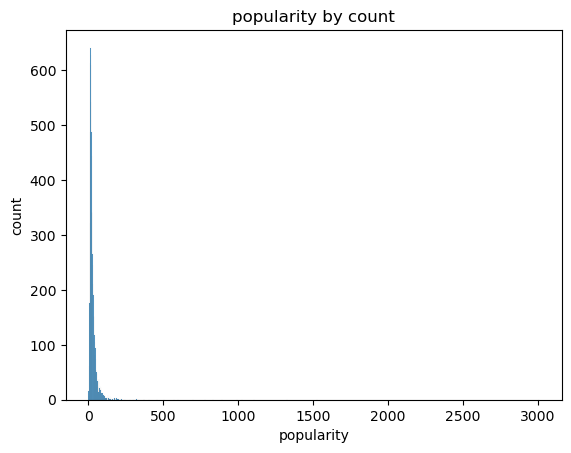

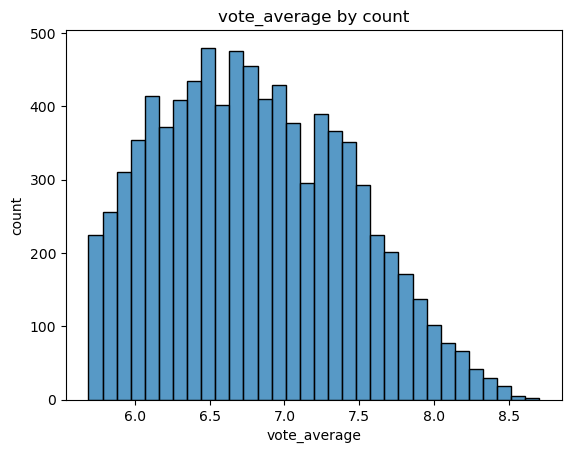

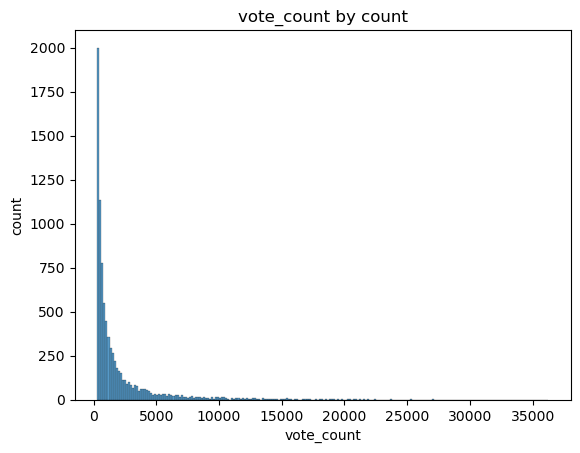

In [35]:
# plotting histograms through for loops

for i, column in enumerate(dat[['popularity', 'vote_average', 'vote_count']]):
    sns.histplot(dat, x = column)
    plt.title(f'{column} by count')
    plt.xlabel(f'{column}')
    plt.ylabel('count')
    plt.show()

Plotting the data further highlights that is extremely skewed to the right a bit, but `popularity` and `vote_count` are extremely skewed, to the point that these plots are not very insightful. Let us check all three columns using `.skew` function.

In [10]:
# skew of popularity
dat['popularity'].skew()

28.391619876010488

In [11]:
# skew of vote_average
dat['vote_average'].skew()

0.27989154916643944

In [12]:
# skew of vote_count
dat['vote_count'].skew()

3.830061623228037

As suspected, we have confirmed `popularity` and `vote_count` are highly skewewd to the right. In order to improve the visual I am going to replace the bottom $0.1$% of the data with the value from the $1$st percentile, and the highest $0.1$% with the value of the $99.5$th percentile, a process also known as winsorization. 

After dealing with those outliers I apply a $\log$ transformation in an attempt to increase the readability of these plots.

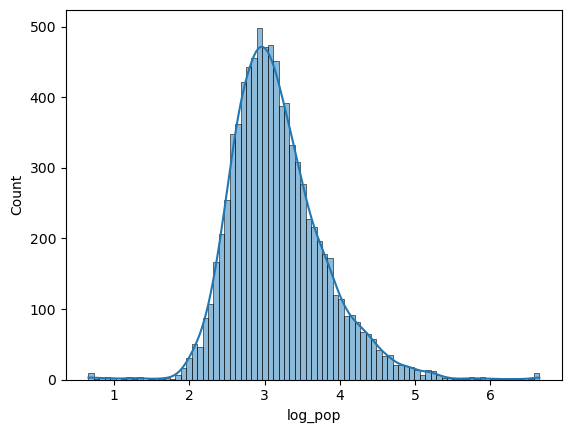

In [30]:
winsorized_pop = mstats.winsorize(dat['popularity'], limits = [0.001,0.001])
log_pop = np.log(winsorized_pop+1)
dat['log_pop'] = log_pop

sns.histplot(dat, x = 'log_pop', kde = True)
plt.show()

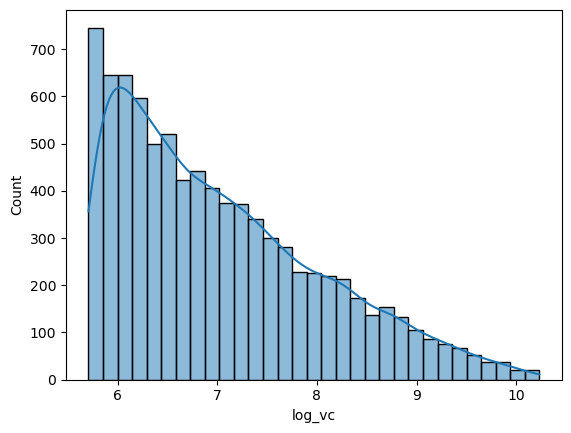

In [31]:
winsorized_vc = mstats.winsorize(dat['vote_count'], limits = [0.001,0.001])
log_vc = np.log(winsorized_vc+1)
dat['log_vc'] = log_vc

sns.histplot(dat, x = 'log_vc', kde = True)
plt.show()

### What are the movies that received so many votes?

In [48]:
# top 150 vote recievers 

dat_top150 = dat.sort_values('vote_count', ascending = False).head(150)
dat_top150

,title,overview,release_date,popularity,vote_average,vote_count,log_pop,log_vc
68,Inception,"Cobb, a skilled thief who commits corporate es...",2010-07-15,94.760,8.368,36238,4.561845,10.232324
41,Interstellar,The adventures of a group of explorers who mak...,2014-11-05,177.797,8.440,35110,5.186251,10.232324
27,The Dark Knight,Batman raises the stakes in his war on crime. ...,2008-07-16,166.733,8.516,32494,5.122373,10.232324
1062,Avatar,"In the 22nd century, a paraplegic Marine is di...",2009-12-15,99.465,7.583,31233,4.609809,10.232324
962,Deadpool,The origin story of former Special Forces oper...,2016-02-09,185.118,7.621,30672,5.226381,10.232324
...,...,...,...,...,...,...,...,...
2199,Pirates of the Caribbean: At World's End,Will Turner and Elizabeth Swann join forces wi...,2007-05-19,102.676,7.258,14117,4.641271,9.555206
2202,Pirates of the Caribbean: At World's End,Will Turner and Elizabeth Swann join forces wi...,2007-05-19,102.676,7.258,14116,4.641271,9.555135
195,Reservoir Dogs,A botched robbery indicates a police informant...,1992-09-02,44.820,8.126,14103,3.824721,9.554214
503,Her,"In the not so distant future, Theodore, a lone...",2013-12-18,62.629,7.857,14078,4.153069,9.552440


In [51]:

dat_top150_stats = dat_top150.describe()
dat_top150_stats

,popularity,vote_average,vote_count,log_pop,log_vc
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,97.129040,7.705573,19191.053333,4.491739,9.830891
std,44.225408,0.557282,4539.628805,0.440275,0.197689
min,18.452000,5.918000,14065.000000,2.967950,9.551516
25%,64.703250,7.338000,15613.500000,4.185145,9.655955
50%,87.667500,7.746000,18120.000000,4.484870,9.804822
75%,117.872500,8.163750,21245.750000,4.778049,9.963958
max,299.585000,8.706000,36238.000000,5.705731,10.232324


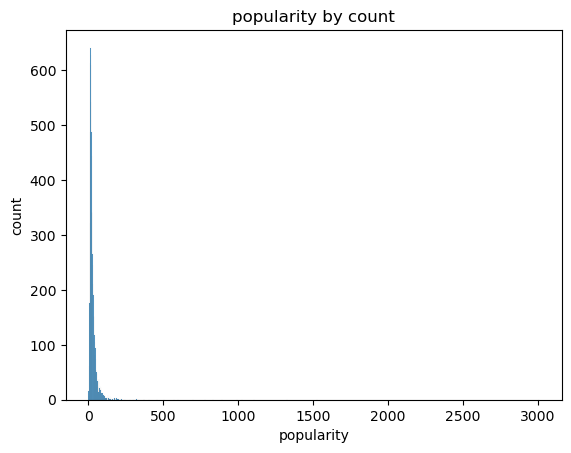

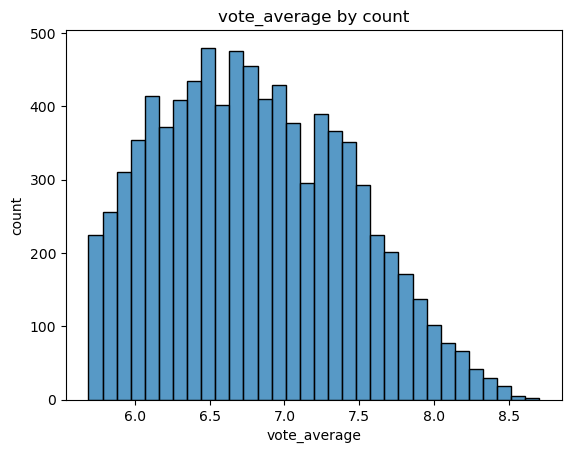

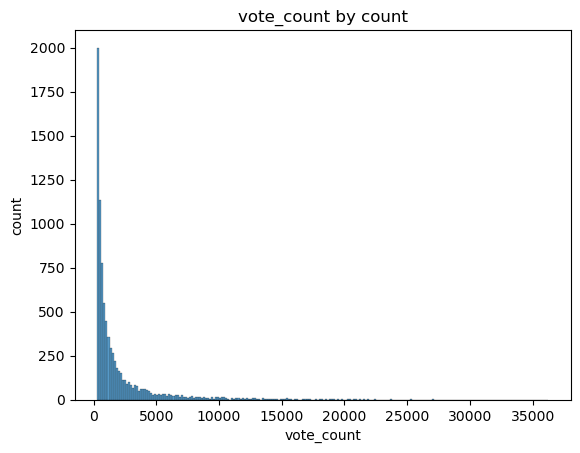

In [58]:
# plotting histograms through for loops

for i, column in enumerate(dat_top150_stats[['popularity', 'vote_average', 'vote_count']]):
    sns.histplot(dat, x = column)
    plt.title(f'{column} by count')
    plt.xlabel(f'{column}')
    plt.ylabel('count')
    plt.show()

### Most popular _____

In [5]:
# 10 most popular movies


mp_movies = dat.sort_values(by = 'vote_average', ascending = False)

mp_movies.head(10)


,title,overview,release_date,popularity,vote_average,vote_count
20,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,1994-09-23,191.303,8.706,26757
21,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,152.632,8.690,20306
22,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,90.368,8.574,12244
23,Schindler's List,The true story of how businessman Oskar Schind...,1993-12-15,92.258,8.565,15659
24,12 Angry Men,The defense and the prosecution have rested an...,1957-04-10,70.095,8.544,8490
25,Spirited Away,"A young girl, Chihiro, becomes trapped in a st...",2001-07-20,139.663,8.535,16288
26,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",1995-10-20,53.491,8.531,4422
27,The Dark Knight,Batman raises the stakes in his war on crime. ...,2008-07-16,166.733,8.516,32494
28,Parasite,"All unemployed, Ki-taek's family takes peculia...",2019-05-30,103.416,8.507,17981
29,The Green Mile,A supernatural tale set on death row in a Sout...,1999-12-10,97.284,8.507,17182


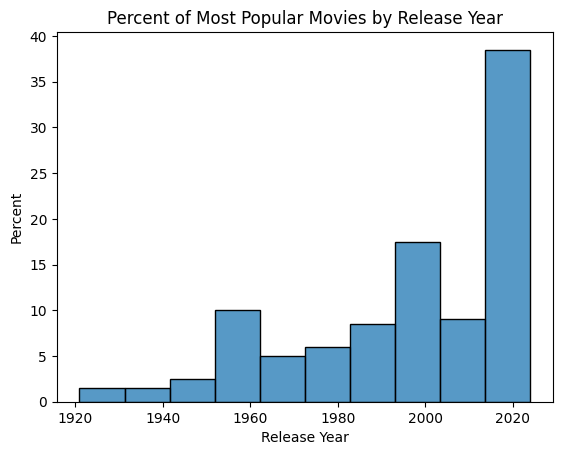

In [6]:
# bar graph of annual popularity

mp_movies['release_year'] = pd.to_datetime(mp_movies['release_date']).dt.year



sns.histplot(mp_movies['release_year'].head(200), bins = 10, stat = 'percent')
plt.title('Percent of Most Popular Movies by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Percent')
plt.show()